In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta 


In [2]:
data = pd.read_csv("nica_sample_data.csv")

In [3]:
data.head()

,Date,Close
0,2023-01-02,401.49
1,2023-01-03,401.72
2,2023-01-04,403.51
3,2023-01-05,407.06
4,2023-01-06,407.09


In [5]:
import ta.momentum


data['MA_5']=data['Close'].rolling(window=5).mean()  #compute 5-day moving average

#compute rsi
rsi_indicator = ta.momentum.RSIIndicator(close=data['Close'],window=14)
data['RSI']=rsi_indicator.rsi()

In [6]:
#focusing on the days where rsi is between 40 and 60
data_filtered = data[(data['RSI']>=40)& (data['RSI']<=60)]

In [7]:
# Shift the 'Close' column up by 1 to create the 'Prediction' column
data['Prediction'] = data['Close'].shift(-1)

# Drop the last row (it has no future value)
data = data[:-1]


In [15]:
import numpy as np

data = data.dropna()
# Features (current day's Close)
X = np.array(data[['Close','MA_5','RSI']])

# Labels (next day's predicted Close)
y = np.array(data['Prediction'])

# #Drop the last row (target is NaN due to shift)
X=X[:-1]
y=y[:-1]

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
data.head()

,Date,Close,MA_5,RSI,Prediction
13,2023-01-19,410.76,413.088,65.319872,407.81
14,2023-01-20,407.81,411.858,52.116314,407.19
15,2023-01-23,407.19,410.590,49.836258,405.66
16,2023-01-24,405.66,409.102,44.645467,406.79
17,2023-01-25,406.79,407.642,48.880406,405.47


In [17]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
# Predict using the test set
predictions = model.predict(X_test)


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 3.444810634039267
R² Score: 0.9580943189248231


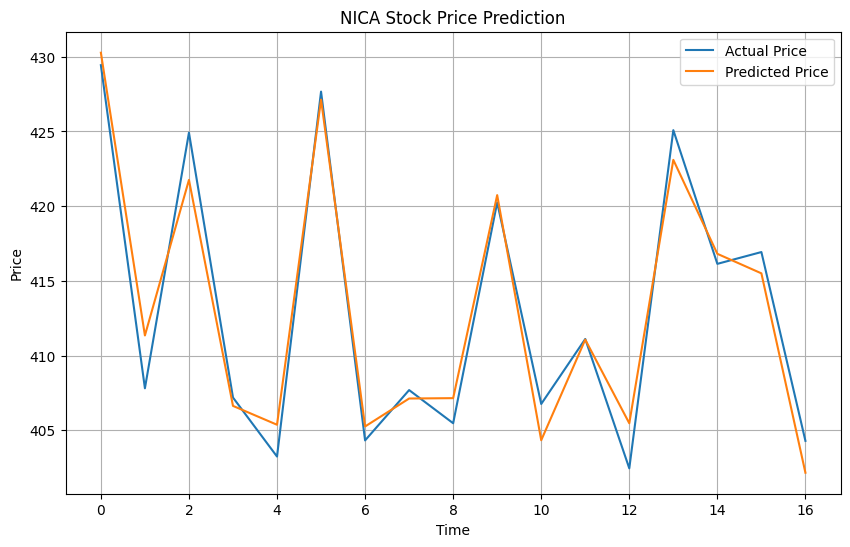

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('NICA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


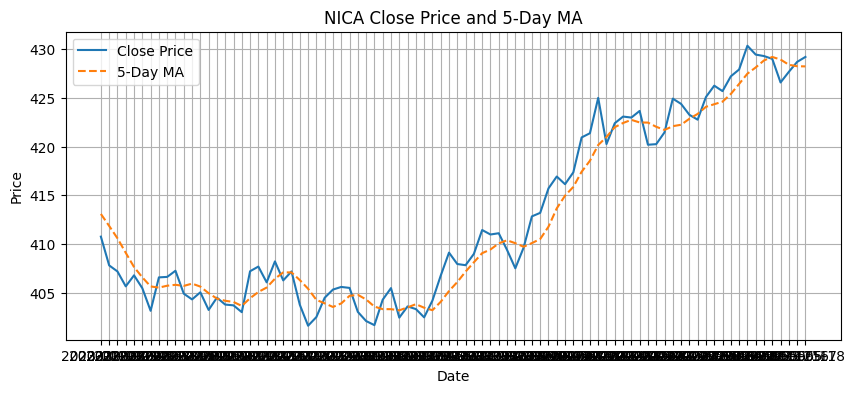

In [21]:
#Plot close price and MA 
plt.figure(figsize=(10,4))
plt.plot(data['Date'],data['Close'],label='Close Price')
plt.plot(data['Date'],data['MA_5'],label='5-Day MA',linestyle="--")
plt.legend()
plt.title("NICA Close Price and 5-Day MA")
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

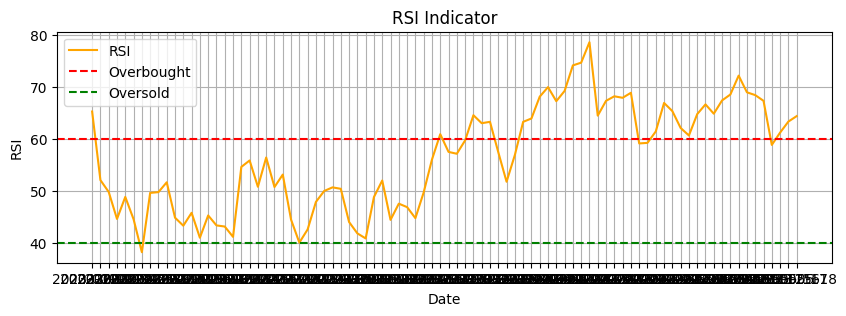

In [23]:
# Plot RSI
plt.figure(figsize=(10, 3))
plt.plot(data['Date'], data['RSI'], color='orange', label='RSI')
plt.axhline(60, color='red', linestyle='--', label='Overbought')
plt.axhline(40, color='green', linestyle='--', label='Oversold')
plt.title('RSI Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
# Predict tomorrow's price using latest values
latest = data[['Close', 'MA_5', 'RSI']].iloc[-1].values.reshape(1, -3)
predicted_price = model.predict(latest)

print(f"📈 Predicted price for tomorrow: {predicted_price[0]:.2f}")

📈 Predicted price for tomorrow: 429.34


In [27]:


# Select the last row's feature values and reshape for prediction
latest_price = np.array([data[['Close', 'MA_5', 'RSI']].iloc[-1].values])

# Predict next day's price
predicted_next_price = model.predict(latest_price)
print(f"📊 Predicted next day price: {predicted_next_price[0]:.2f}")



📊 Predicted next day price: 429.34
